<small><i>This notebook was put together by [Wesley Beckner](http://wesleybeckner.github.io/).</i></small>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator as Calculators
%matplotlib inline

plt.rc("figure", facecolor="white")

params = {
    'lines.markersize' : 10,
    'axes.labelsize': 20,
    'font.size': 20,
    'legend.fontsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'text.usetex': False,
   }

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]   

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [4]:
import pandas as pd
import json
import os
import sys
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import salty

In [5]:
salty.checkName("1-butyl-3-methylimidazolium ,trifluoromethanesulfonate")

database found
user has queried with a name
your query has returned CCCCN1C=C[N+](=C1)C,C(F)(F)(F)S(=O)(=O)[O-]


'CCCCN1C=C[N+](=C1)C,C(F)(F)(F)S(=O)(=O)[O-]'

In [52]:
for i in range(2266):
    with open("../salty/data/density/%s.json" % str(i+1)) as json_file:
        json_data = json.load(json_file)
        json_data2 = pd.DataFrame(json_data['data'])
        json_data2.columns = ['Temperature', 'Pressure', 'Specific Density']
        print(json_data)

{u'phases': [u'Liquid'], u'solvent': None, u'footer': u'', u'expmeth': u'Vibrating tube method', u'ref': {u'full': u'Safarov, J.; Hamidova, R.; Zepik, S.; Schmidt, H.; Kul, I.; Shahverdiyev, A.; Hassel, E. (2013) J. Mol. Liq. 187, 137-156.', u'title': u'Thermophysical properties of 1-hexyl-3-methylimidazolium  bis(trifluoromethylsulfonyl)imide at high temperatures and pressures'}, u'title': u'Volumetric properties: Specific density', u'dhead': [[u'Temperature, K', None], [u'Pressure, kPa', None], [u'Specific density, kg/m<SUP>3</SUP>', u'Liquid']], u'components': [{u'sample': [[u'Source:', u'commercial source'], [u'Initial purification:', u'stated by supplier'], [u'Initial purity:', u'98 mass %'], [u'Final purification:', u'Karl Fischer titration'], [u'Final purity:', u'0.03 water mass %(dried by vacuum heating)']], u'formula': u'C<SUB>12</SUB>H<SUB>19</SUB>F<SUB>6</SUB>N<SUB>3</SUB>O<SUB>4</SUB>S<SUB>2</SUB>', u'mw': u'447.42', u'idout': u'ABiCGC', u'name': u'1-hexyl-3-methylimidazoli

{u'phases': [u'Liquid'], u'solvent': None, u'footer': u'', u'expmeth': u'Vibrating tube method', u'ref': {u'full': u'Guerrero, H.; Martin, S.; Perez-Gregorio, V.; Lafuente, C.; Bandres, I. (2012) Fluid Phase Equilib. 317, 102-109.', u'title': u'Volumetric characterization of pyridinium-based ionic liquids'}, u'title': u'Volumetric properties: Specific density', u'dhead': [[u'Temperature, K', None], [u'Pressure, kPa', None], [u'Specific density, kg/m<SUP>3</SUP>', u'Liquid']], u'components': [{u'idout': u'AApeQy', u'sample': [[u'Source:', u'commercial source'], [u'Initial purification:', u'stated by supplier'], [u'Initial purity:', u'98 mass %'], [u'Final purification:', u'ion-selective electrode;Karl Fischer titration'], [u'Final purity:', u'0.2 halide impurity mass %;0.05 water mass %(dried in a desiccator;dried by vacuum heating)']], u'mw': u'216.28', u'name': u'1-butyl-3-methylpyridinium dicyanamide', u'formula': u'C<SUB>12</SUB>H<SUB>16</SUB>N<SUB>4</SUB>'}], u'constr': [], u'data'

{u'phases': [u'Liquid'], u'solvent': None, u'title': u'Volumetric properties: Specific density', u'expmeth': u'Isochoric PVT measurement', u'data': [[[u'284.727'], [u'40082'], [u'1309.7', u'1.3']], [[u'284.743'], [u'29331'], [u'1305.8', u'1.3']], [[u'285.119'], [u'9993.5'], [u'1296.4', u'1.3']], [[u'285.204'], [u'19389'], [u'1300.9', u'1.3']], [[u'285.804'], [u'1326.9'], [u'1293', u'1.3']], [[u'290.95'], [u'50018'], [u'1309.1', u'1.3']], [[u'291.302'], [u'39987'], [u'1305.1', u'1.3']], [[u'291.577'], [u'20094'], [u'1295.8', u'1.3']], [[u'291.59'], [u'10267'], [u'1292.4', u'1.3']], [[u'292.001'], [u'30197'], [u'1300.2', u'1.3']], [[u'292.029'], [u'1055.4'], [u'1288.3', u'1.3']], [[u'298.143'], [u'10219'], [u'1287.7', u'1.3']], [[u'298.145'], [u'19834'], [u'1291.8', u'1.3']], [[u'298.146'], [u'20203'], [u'1291.8', u'1.3']], [[u'298.146'], [u'29284'], [u'1295.2', u'1.3']], [[u'298.146'], [u'61191'], [u'1308.4', u'1.3']], [[u'298.147'], [u'39935'], [u'1299.6', u'1.3']], [[u'298.153'], [u'3

{u'phases': [u'Liquid'], u'solvent': None, u'title': u'Volumetric properties: Specific density', u'expmeth': u'Vibrating tube method', u'data': [[[u'100'], [u'298.15'], [u'1009.3', u'2']], [[u'100'], [u'308.15'], [u'1002.8', u'2']], [[u'100'], [u'318.15'], [u'996.3', u'2']], [[u'100'], [u'328.15'], [u'989.9', u'2']], [[u'100'], [u'338.15'], [u'983.5', u'2']], [[u'100'], [u'348.15'], [u'977.2', u'2']], [[u'100'], [u'358.15'], [u'970.9', u'2']], [[u'5000'], [u'298.15'], [u'1011.6', u'2']], [[u'5000'], [u'308.15'], [u'1005.2', u'2']], [[u'5000'], [u'318.15'], [u'998.9', u'2']], [[u'5000'], [u'328.15'], [u'992.6', u'2']], [[u'5000'], [u'338.15'], [u'986.4', u'2']], [[u'5000'], [u'348.15'], [u'980.1', u'2']], [[u'5000'], [u'358.15'], [u'974', u'2']], [[u'10000'], [u'298.15'], [u'1014.1', u'2']], [[u'10000'], [u'308.15'], [u'1007.7', u'2']], [[u'10000'], [u'318.15'], [u'1001.5', u'2']], [[u'10000'], [u'328.15'], [u'995.2', u'2']], [[u'10000'], [u'338.15'], [u'989.1', u'2']], [[u'10000'], [u'

{u'phases': [u'Liquid'], u'solvent': None, u'footer': u'', u'expmeth': u'Vibrating tube method', u'ref': {u'full': u'Lachwa, J.; Morgado, P.; Esperanca, J. M. S. S.; Guedes, H. J. R.; Lopes, J. N. C.; Rebelo, L. P. N. (2006) J. Chem. Eng. Data 51, 2215-2221.', u'title': u'Fluid-Phase Behavior of {1-Hexyl-3-methylimidazolium Bis(trifluoromethylsulfonyl) Imide, [C6mim][NTf2], + C2-C8 n-Alcohol} Mixtures: Liquid-Liquid Equilibrium and Excess Volumes'}, u'title': u'Volumetric properties: Specific density', u'dhead': [[u'Temperature, K', None], [u'Pressure, kPa', None], [u'Specific density, kg/m<SUP>3</SUP>', u'Liquid']], u'components': [{u'idout': u'ABiCGC', u'sample': [[u'Source:', u'synthesized by others'], [u'Purification:', u'NMR (proton);Karl Fischer titration;ion-selective electrode'], [u'Purity:', u'99.5 % (basis not specified);0.002 water mass %;0.001 halide impurity mass %']], u'mw': u'447.42', u'name': u'1-hexyl-3-methylimidazolium bis[(trifluoromethyl)sulfonyl]imide', u'formula'

ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

In [47]:
with open("../salty/data/density/1.json") as json_file:
    json_data = json.load(json_file)  
    json_data2 = pd.DataFrame(json_data['data'])
    json_data2.columns = ['Temperature', 'Pressure', 'Specific Density']
    json_data3 = pd.DataFrame(json_data['components'])
    print(json_data3['name'].values[0])
    for densities in range(len(json_data2['Specific Density'].values)):
        print(json_data2['Temperature'].values[densities][0])
        print(json_data2['Pressure'].values[densities][0])
        print(json_data2['Specific Density'].values[densities][0])
        

1-hexyl-3-methylimidazolium bis[(trifluoromethyl)sulfonyl]imide
273.13
50000
1425.4
273.13
99920
1449.1
273.14
20000
1408
273.14
69900
1435.5
273.14
120000
1457.5
273.15
101
1394.5
273.15
1025
1395.5
273.15
10021
1401.6
273.15
29950
1414.1
273.15
39960
1419.9
273.15
59920
1430.5
273.15
80000
1440.3
273.15
110000
1453.4
273.15
130000
1461.5
273.15
140000
1465.4
273.16
5032
1398.2
273.17
89920
1444.8
283.12
1145
1386.6
283.13
5278
1389.6
283.14
19640
1399.3
283.14
29980
1405.8
283.14
30060
1405.9
283.14
40160
1411.9
283.14
50100
1417.6
283.15
101
1385.9
283.15
9894
1392.8
283.15
10240
1393
283.15
20040
1399.6
283.15
40070
1411.9
283.15
50030
1417.5
283.15
60350
1423.1
283.15
90030
1437.7
283.15
90540
1437.9
283.15
99590
1442
283.15
99690
1442
283.15
109500
1446.3
283.15
119600
1450.6
283.15
130000
1454.8
283.15
139900
1458.8
283.16
5245
1389.6
283.16
60230
1423
283.16
69310
1427.7
283.16
70000
1428
283.16
79510
1432.7
283.16
80500
1433.2
283.18
1894
1387.2
293.14
79830
1425.5
293.14
9003

In [76]:
with open("../salty/data/density/1.json") as json_file:
    json_data = json.load(json_file)  
    json_data2 = pd.DataFrame(json_data['data'])
    json_data2.columns = ['Temperature', 'Pressure', 'Specific Density']
    json_data3 = pd.DataFrame(json_data['components'])
    print(json_data3['name'].values[0])
    temps = pd.DataFrame(json_data2['Temperature'][:].values)
    press = pd.DataFrame(json_data2['Pressure'][:].values)
    dens = pd.DataFrame(json_data2['Specific Density'][:].values)

    print(json_data2['Pressure'].values[densities][0])
    print(json_data2['Specific Density'].values[densities][0])
    print(temps[0][0][0])

1-hexyl-3-methylimidazolium bis[(trifluoromethyl)sulfonyl]imide
59920
1321.9
273.13


In [5]:
import rdkit
# import pychem 
# from pychem.pychem import PyChem2d, PyChem3d
# from rdkit import Chem
# from rdkit.Chem import AllChem

import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import itertools as it
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from __future__ import print_function
import numpy.linalg as LINA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

plt.rc("figure", facecolor="white")

params = {
    'lines.markersize' : 10,
    'axes.labelsize': 20,
    'font.size': 20,
    'legend.fontsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'text.usetex': False,
   }

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]   

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)   

    
# salts=pd.read_csv('Viscosity.csv',delimiter=',')
# #salts=pd.read_csv('cocosalts.csv',delimiter='\t')
# #salts=pd.read_csv('nonchlsalts.csv')
# salts = salts[salts.NAME_ANI != 'chloride']  #chloride returns an error in pychem
# salts = salts[salts.NAME_ANI != 'bromide']  #bromide returns an error in pychem
# salts = salts[salts.NAME_ANI != 'trifluorotris(perfluoroethyl)phosphate(V)']
# salts = salts[salts.NAME_ANI != 'iodide']
# salts = salts.reset_index() #reset the index so our for loops work

# MDsalts=pd.read_csv('combinedviscosity.csv',delimiter=',')

ImportError: No module named sklearn.linear_model

<a id='top'></a>
# 2D descriptor selection with LASSO and SVR

PyChem calculates 1266 descriptors for each of the IL pairs. Single atom ions cause PyChem to return an error, so those are removed from the dataset. Viscosity, cation, and anion data are appended to the pandas data frame

If not making changes to the starting dataset, load the .npy file directly [here](#direct load)

load the train/test split according to MD calcs data [here](#splitByMD)

load the scikit svr code [here](#svr load)

load generic lasso train/test sets [here](#lasso load)

load coco's lasso code [here](#coco lasso load)

load the scikit lasso code [here](#lasso scikit load)

## Algorithmic solvent search

load cation, anion pairing code [here](#mix)

If not making changes to the mixed salts, load the .npy file directly [here](#direct)

load SVR prediction [here](#svr)

load coco's prediction [here](#coco)

load scikit lasso prediction [here](#lasso)

## Other regression methods

load the choose code [here](#choose code)

load the choose 10 lasso code [here](#lasso code)

load the PCA code [here](#pca code)

load the choose results [here](#descriptor load)

[read about the descriptors](#background)

In [108]:
###READ SMILES INTO PYCHEM AND CREATE DATAFRAME
cats = pd.DataFrame(columns=salts['NAME_CAT']) #loop through all the salts
old = pd.DataFrame()
new = pd.DataFrame()
for a, b in enumerate(salts['NAME_CAT']):    
    catdes=[] #descriptors for cations
    andes=[] #descriptors for anions
    cat=PyChem2d() #create PyChem molecular instances
    an=PyChem2d()
    try:
        print(b,salts['SMILE_anion'][a]) #check that we're computing
        cat.ReadMolFromSmile(np.str(salts['SMILE_cation'][a])) #cation
        an.ReadMolFromSmile(np.str(salts['SMILE_anion'][a])) #anion
        andes.append(an.GetAllDescriptor()) 
        catdes.append(cat.GetAllDescriptor()) #add all the descriptors    
        dfan = pd.DataFrame(andes) #turn the array into a dataframe
        dfcat = pd.DataFrame(catdes)
        dfan.rename(columns=lambda x: x + 'anion', inplace=True) #rename headers (cation or anion)
        dfcat.rename(columns=lambda x: x + 'cation', inplace=True)
        df = pd.concat([dfcat, dfan], axis=1) #concatonate cationic and anionic descriptor df's
        if a != 0: #grow the dataframe
            new = pd.concat([df, old], axis=0)
        old = new
    except: #note that single-atom ions return an error in pychem, if failed computations are indicated remove problem
        pass #entries in the cell above
        print('failed ',b,salts['NAME_ANI'][a])

1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(C(F)(F)S(=O)(=O)NS(=O)(=O)C(C(F)(F)F)(F)F)(F)(F)F
1-butyl-3-methylimidazolium  CC(=O)[O-]
1-butyl-3-methylimidazolium  CC(=O)[O-]
1-butyl-3-methylimidazolium  CC(=O)[O-]
1-butyl-3-methylimidazolium  CC(=O)[O-]
1-butyl-3-methylimidaz

In [33]:
###Append these values in a separate step since 
###calculating the descriptors is computationally expensive

desc = new
desc=desc.reset_index()
desc.loc[:,'T'] = pd.Series(salts['T'], index=desc.index)
for a in range(len(salts['T'])):
    desc.iloc[a-1,-1] = salts['T'][a]
desc.loc[:,'P'] = pd.Series(salts['P'], index=desc.index)
for a in range(len(salts['P'])):
    desc.iloc[a-1,-1] = salts['P'][a]
desc.loc[:,'NAME_CAT'] = pd.Series(salts['NAME_CAT'], index=desc.index)
for a in range(len(salts['NAME_CAT'])):
    desc.iloc[a-1,-1] = salts['NAME_CAT'][a]
desc.loc[:,'NAME_ANI'] = pd.Series(salts['NAME_ANI'], index=desc.index)
for a in range(len(salts['NAME_ANI'])):
    desc.iloc[a-1,-1] = salts['NAME_ANI'][a]
desc.loc[:,'Viscosity'] = pd.Series(salts['Viscosity'], index=desc.index)
for a in range(len(salts['Viscosity'])):
    desc.iloc[a-1,-1] = salts['Viscosity'][a]

In [35]:
pd.DataFrame.to_csv(desc, path_or_buf='viscositydescriptors')

<a id='direct load'></a>
# Direct data load

[back to top](#top)

In [5]:
data = pd.DataFrame.from_csv('viscositydescriptors') #load data
data = data.loc[:, (data != 0).any(axis=0)] #remove columns where all values are 0
data.dropna(inplace=True) #remove empty columns and rows with NaN 
X_std = data.drop('NAME_CAT',1) #remove non-numeric columns and normalize values
X_std = X_std.drop('NAME_ANI',1)
X_std = StandardScaler().fit_transform(X_std)
n = data.shape[0]
n_train = int(n*0.8) #set fraction of data to be for training
n_test  = n - n_train

<a id='svr load'></a>

# SVR MODEL

[back to top](#top)

In [20]:
Deslist=data.columns.values[:-3] #save descriptor list for Coco's code
data=np.array(data)
#data=X_std
n = data.shape[0]
d = data.shape[1]
d -= 3

print(n,d)

data = np.random.permutation(data) #if you delete, will not be random ie separate by group
X_train = np.zeros((n_train,d)) #prepare train/test arrays
X_test  = np.zeros((n_test,d))
Y_train = np.zeros((n_train))
Y_test = np.zeros((n_test))

X_train[:] = data[:n_train,:-3] #fill arrays according to train/test split
Y_train[:] = data[:n_train,-1].astype(float)

X_test[:] = data[n_train:,:-3]
Y_test[:] = data[n_train:,-1].astype(float)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

394 750
(315, 750)
(79, 750)
(315,)


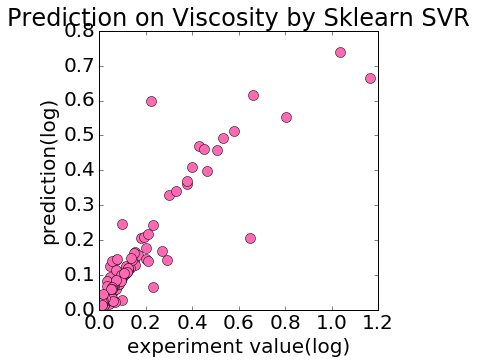

In [21]:
clf = SVR(C=1.0, epsilon=0.01,max_iter=10000)
clf.fit(X_train,Y_train)

plt.figure(figsize=(5,5))
plt.plot(Y_train,clf.predict(X_train),"o",color ='hotpink')
#plt.plot(np.arange(-6,1,0.0001),np.arange(-6,1,0.0001),color = 'black')
#plt.axis([-6,1,-6,1])
plt.xlabel('experiment value(log)')
plt.ylabel('prediction(log)')
plt.title('Prediction on Viscosity by Sklearn SVR')
plt.show()

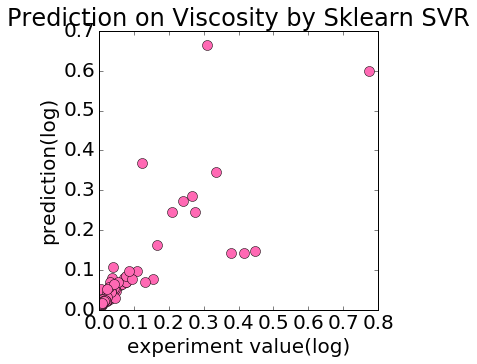

In [22]:
plt.figure(figsize=(5,5))
plt.plot(Y_test,clf.predict(X_test),"o",color ='hotpink')
plt.xlabel('experiment value(log)')
plt.ylabel('prediction(log)')
plt.title('Prediction on Viscosity by Sklearn SVR')
plt.show()

<a id='lasso load'></a>

# LASSO MODEL

[back to top](#top)

a description of lasso can be found [here](http://www.moleculardescriptors.eu/tutorials/T6_moleculardescriptors_variable_selection.pdf)

In [12]:
Deslist=data.columns.values[:-3] #save descriptor list for Coco's code
data=np.array(data)
#data=X_std
n = data.shape[0]
d = data.shape[1]
d -= 3

print(n,d)

#data = np.random.permutation(data) #if you delete, will not be random ie separate by group
X_train = np.zeros((n_train,d)) #prepare train/test arrays
X_test  = np.zeros((n_test,d))
Y_train = np.zeros((n_train))
Y_test = np.zeros((n_test))

X_train[:] = data[:n_train,:-3] #fill arrays according to train/test split
Y_train[:] = np.log(data[:n_train,-1].astype(float))

X_test[:] = data[n_train:,:-3]
Y_test[:] = np.log(data[n_train:,-1].astype(float))

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

394 750
(326, 750)
(68, 750)
(326,)


##### <a id='coco lasso load'></a>

## Coco LASSO code

In [95]:
w = np.zeros(d) #array length of descriptors
w0 = w0last = 0
converged = False
yh = np.zeros(n_train) #prediction from model
rgl= 1 #regulation, bias against additional parameters
ITR = 100000 #iterations
itr = 0
while not converged: 
    yh = np.add(X_train.dot(w), w0*np.ones(n_train))
    w0last = w0
    wlast = np.copy(w)
    w0 = np.sum(np.subtract(Y_train, yh))/n_train
    yh = np.add(yh,(w0-w0last)*np.ones(n_train))
    for k in range (0,d):
        Xk = X_train[:,k]
        ak = Xk.T.dot(Xk)
        ck = Xk.T.dot(Y_train-yh+w[k]*Xk)
        if ck < (-1 * rgl):
            w[k] = (ck + rgl)/ak
        elif ck > rgl:
            w[k] = (ck - rgl)/ak
        else:
            w[k] = 0
        yh = np.add(yh,(w[k]-wlast[k])*X_train[:,k])    
    SUB = np.subtract(w, wlast)
    check = np.dot(SUB.T,SUB)
    if (check< 0.00000000001):
        converged = True;
        print("success")
        break     
    itr += 1
    if itr == ITR:
        print("failed")
        break

success


In [96]:
y_train = np.add(X_train.dot(w), w0*np.ones(n_train))
print(w0)
print(LINA.norm(Y_train-y_train))
D = int((d-2)/2)
wes = []  #make a df for my slides
for i in range(d):
    if w[i]>0 :
        if (i<D):
            print("CATION",Deslist[i],i)
            wes.append("CATION " + Deslist[i])
        if (i>=D and i<2*D):
            print("ANION",Deslist[i],i)
            wes.append("ANION " + Deslist[i])
        if (i == d-1):
            print("T")
        if (i == d):
            print("P")

2.70987165579e-05
1.21951623346
CATION Tschcation 247
ANION IDETanion 456
ANION ISIZanion 457
ANION Weightanion 591


In [97]:
forslides = pd.DataFrame(wes)
forslides.rename(index=int, columns={0:"Top Features"})

,Top Features
0,CATION Tschcation
1,ANION IDETanion
2,ANION ISIZanion
3,ANION Weightanion


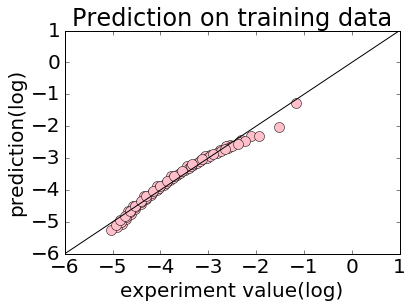

In [98]:
y_train = np.add(X_train.dot(w), w0*np.ones(n_train))
plt.plot(Y_train,y_train,"o",color ='pink')
plt.plot(np.arange(-6,1,0.0001),np.arange(-6,1,0.0001),color = 'black')
plt.axis([-6,1,-6,1])
plt.xlabel('experiment value(log)')
plt.ylabel('prediction(log)')
plt.title('Prediction on training data')
plt.show()

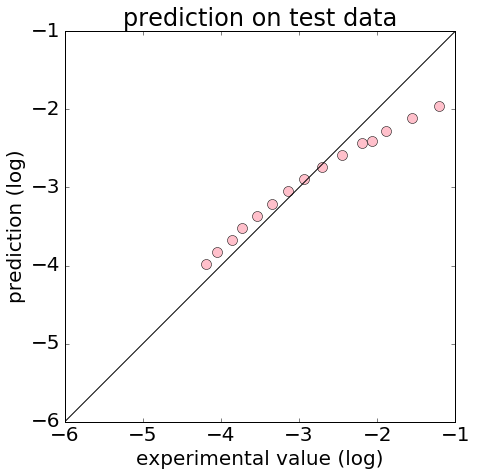

In [99]:
plt.rcParams.update(params)
y_test = np.add(X_test.dot(w), w0*np.ones(n_test))
fig=plt.figure(figsize=(7,7), dpi=300)
plt.plot(Y_test,y_test,"o",color = "pink")
plt.plot(np.arange(-6,1,0.0001),np.arange(-6,1,0.0001),color = 'black')
plt.axis([-6,1,-6,1])
plt.xlim(-6,-1)
plt.ylim(-6,-1)
plt.xlabel('experimental value (log)')
plt.ylabel('prediction (log)')
plt.title('prediction on test data')
fig.savefig(filename='lassoplot.pdf', bbox_inches='tight', format='pdf') 
plt.show()

<a id='lasso scikit load'></a>
load the choose code [here](#choose code) or see results below

## SciKitLearn LASSO 

[back to top](#top)

In [4]:
model = Lasso()
model.fit(X_train,Y_train)
model.predict(X_test)

array([-4.29467142, -4.46469153, -4.63471164, -4.80473175, -4.97475186,
       -5.14477197, -5.31479208, -5.48481218, -2.59447034, -2.76449045,
       -2.43816935, -2.60818946, -2.77820957, -2.94822968, -3.11824979,
       -3.2882699 , -3.45829   , -3.62831011, -3.79833022, -3.96835033,
       -4.13837044, -4.30839055, -4.47841065, -4.64843076, -4.81845087,
       -4.42383124, -2.04354972, -2.21356983, -2.38358994, -2.55361005,
       -2.72363015, -2.89365026, -3.06367037, -3.23369048, -3.40371059,
       -3.5737307 , -3.74375081, -3.91377091, -4.04233806, -2.17211686,
       -2.34213697, -2.51215708, -2.68217719, -2.8521973 , -2.89111035,
       -3.06113046, -3.23115057, -3.40117068, -3.57119078, -3.74121089,
       -1.8709897 , -2.04100981, -2.21102992, -2.38105003, -2.55107013,
       -2.72109024, -2.89111035, -3.06113046, -3.23115057, -3.40117068,
       -3.57119078, -2.71351566, -1.84663205, -2.01665216, -2.18667227,
       -2.35669237, -2.52671248, -2.69673259, -2.8667527 , -3.03